## Evaluating Data Models


### Learning Objectives:

* Become familiar with Scikit-Learn's "bunch" object datasets (load_boston, load_breast_cancer)


* Identifying the baseline accuracy / error that naturally exists from the data set.


* Using the Breast Cancer dataset (load_breast_cancer):

    - Prototype basic classification models (LogReg, KNN, DecTrees).
    
    - Determine if our models outperform the baseline accuracy (is this model better than just guessing the **majority class**?
    
    - Evaluate the best performing model based on classification metrics (Accuracy, Precision, Recall, F1-Score, ROC, AUC)
    
    
* Using the Boston Housing dataset (load_boston):

    - Prototype basic regression models (LinReg, Ridge, LASSO)
    
    - Determine if our models outperform the baseline error (is this model better than just guessing the **mean** of the target variable?)
    
    - Evaluate the best performing model based on regression metrics (R^2 Accuracy, RMSE)

### Part I. Classification using the Breast Cancer Dataset

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option("max.columns", 40)

In [4]:
#Prepare Cancer Dataset
lbc = load_breast_cancer()

cancer_df = pd.DataFrame(data = lbc.data, columns = lbc.feature_names)
cancer_df['target'] = lbc.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
## View documentation for breast cancer data:
print(lbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
print(lbc.target_names)

['malignant' 'benign']


In [7]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

* From the documentation (.DESCR):

    > :Class Distribution: 212 - Malignant, 357 - Benign
    
* We know that Benign = 1, Malignant = 0
    * In other words, "1" is non-cancerous, "0" is cancerous
    * If we divide these numbers by the total number of samples (569), we can get the % of each class.
        - We can use the keyword arguement "normalize = True" to do this!

In [8]:
cancer_df.target.value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

#### Baseline for a Classification model:

* For a classification model, the "majority class" present in the target variable is the baseline accuracy.
* From the above calculation we can conclude:
    - Probability that the tumor is Malignant ("0") is ~37%
    - Probability that the tumor is Benign ("1") is ~63%
    
* **Since the majority class is "Benign" (357 samples out of 569), the baseline accuracy is 62.7%**
    - For a useful model, we need to beat 62.7%
    - Otherwise, if we were to just guess the probability of the majority class for each sample, our predictions would be correct only ~62.7% of the time.
    - A model that performs worse that the baseline is *worse than arbitrarily guessing the probability of the most common class in the data*.

Note:  Typically, the convention for class labels are positives as "1's" and negatives as "0's."  This dataset is old and they use the "backwards" notation, but here we can explicitly define "postives" as "malignant" and "negatives" as "benign" as is the language used in medical testing.

### Classification metrics:

### $\\ Accuracy = \frac {True Positives + True Negatives}{N_{samples}}$

### $\\ False Positive Rate = \frac {False Positives}{N_{negatives}}$

### $\\ True Positive Rate = \frac {True Positives}{N_{positives}}$

### $\\ Precision = \frac {True Positives}{TruePositives + FalsePositives}$

### $\\ Recall = TPR =  \frac {True Positives}{FalseNegatives + TruePositives}$

### $\\ F1-Score = 2 \frac {precision  *  recall}{precision + recall}$

* Accuracy isn't everything!
    - Often times wrong predictions matter *more* than total accuracy, depending on what is misclassified.
    - Accuracy doesn't tell you how well a model can differentiate between false positives and false negatives.
    
    
* When evaluating a classification model, mind what labels a model is mislabeling.
    - For this cancer diagnosing, a false negative (diagnoses bengin when a tumor is actually cancerous/malignant) is a more costly result than a false positive (labeled as malignant than actually benign).
    - A model than is more likely to wrongly diagnose a patient as being cancer free when they really do have cancer would be awful!
    
    
* To adress these kinds of errors, we use the True Positve Rate, False Positive Rate, Precision, and Recall to quantify *how* a model is misclassifying samples.


**True Positive Rate (Recall)**: % of positive predictions are correctly classified as positive.
- (This tumor was diagnosed with as malignant, and really is malignant.  The patient has cancer and classified to have cancer.)
        
        
        
**False Positive Rate**: % of positive predictions that are incorrectly classified as negatives.
- (This tumor was diagnosed as benign, but really is malginant.  The patient has cancer but diagnoses as cancer-free).
        
        
        
**Precision**: The "positive predictive power," the % of positive predictions compared to the total of number of all both false and true positives.
- (If precision is low, then this model is poor at correctly classifying malignant tumors.

In [9]:
cancer_df.corr()['target'].sort_values()[:-1]

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

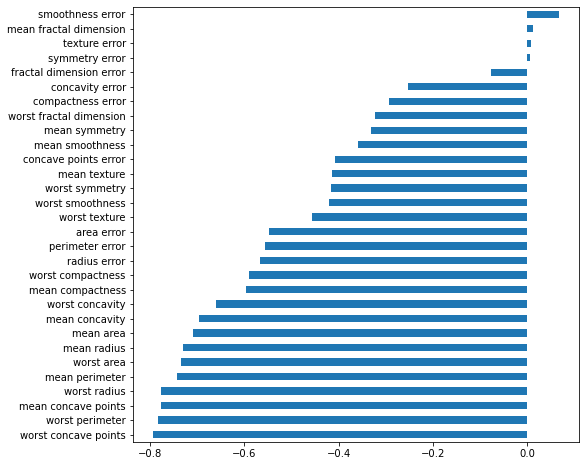

In [10]:
plt.figure(figsize=(8,8))
cancer_df.corr()['target'].sort_values()[:-1].plot(kind = 'barh')

### Let's start modeling with a few basic models
1. Logistic Regression 
2. K-Nearest Neighbors (KNN)
3. Decision Trees


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [12]:
# Train Test Split
X = cancer_df.drop(columns = ['target'])
y = cancer_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Declare Model Objects
logreg = LogisticRegression()
knn    = KNeighborsClassifier()
tree   = DecisionTreeClassifier()

# Fit training data

logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train);

C:\Users\h451398\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
def print_scores(model, model_name):
    print("{} R^2 Scores : ".format(model_name))
    print("Training Set : {:.2%}".format(model.score(X_train, y_train)))
    print("Testing Set  : {:.2%}\n".format(model.score(X_test, y_test)))
    
def print_report(model):
    print(classification_report(model.predict(X_test), y_test))

def plot_roc_curve(model):
    
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    model_auc = auc(fpr,tpr)
    
    plt.figure(figsize=(6,6))
    plt.plot([0,1],[0,1])
    plt.xlabel('FPR', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.ylabel('TPR', fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title('ROC Curve\nAUC : ' + str(model_auc.round(3)), fontsize = 18)
    plt.plot(fpr, tpr) 
    

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    ## From the Scikit-Learn Documentation
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def show_all_scores(model, model_name):
    print("------ Showing all results for {} --------\n".format(model_name))
    print(model, "\n")
    print_scores(model, model_name)
    print_report(model)
    plot_confusion_matrix(y_test, model.predict(X_test), classes = lbc.target_names, normalize = False)
    plot_roc_curve(model)

------ Showing all results for LogReg --------

LogisticRegression() 

LogReg R^2 Scores : 
Training Set : 94.72%
Testing Set  : 92.40%

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



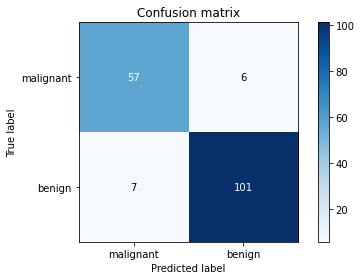

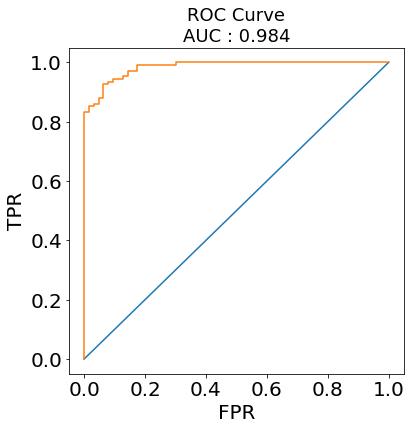

In [14]:
show_all_scores(logreg, "LogReg")

------ Showing all results for KNN --------

KNeighborsClassifier() 

KNN R^2 Scores : 
Training Set : 93.72%
Testing Set  : 92.98%

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        61
           1       0.95      0.94      0.94       110

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



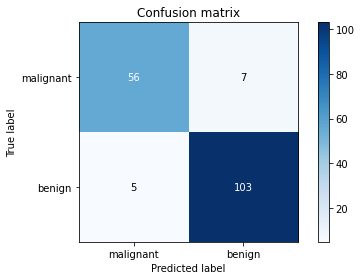

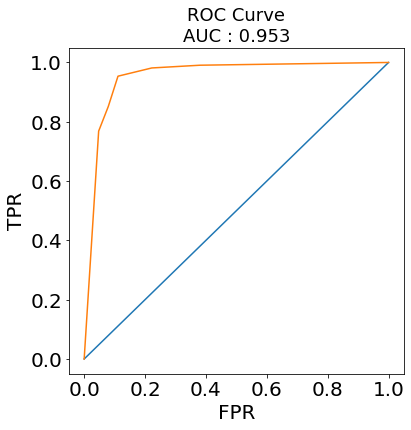

In [15]:
show_all_scores(knn, "KNN")

------ Showing all results for DecTree --------

DecisionTreeClassifier() 

DecTree R^2 Scores : 
Training Set : 100.00%
Testing Set  : 92.98%

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        57
           1       0.97      0.92      0.95       114

    accuracy                           0.93       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



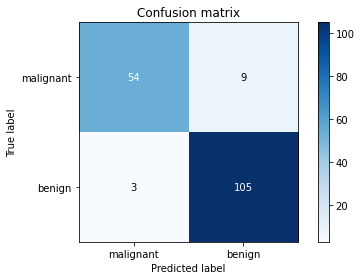

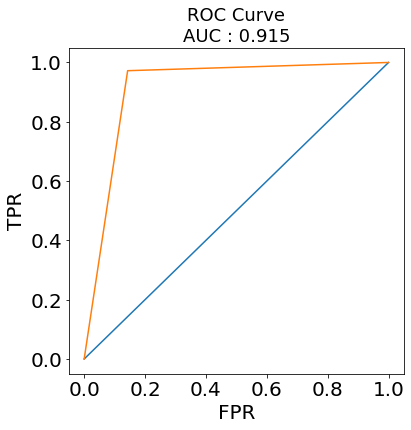

In [16]:
show_all_scores(tree, "DecTree")

### Conclusions:


### Part II. Regression using the Boston Housing Dataset

In [17]:
#Prepare Cancer Dataset
boston = load_boston()

boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# View documentation for boston data:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* From the documentation (.DESCR):

    > MEDV     Median value of owner-occupied homes in $1000's
    
* This target variable for this dataset is the value of each home, "MEDV."
* This is a continuous variable, expressed in units of thousands.
* Note: This data came from a study published in 1978 and not adjusted for inflation, so the overall prices of these homes will look lower than they would in 2019 Boston, MA.

<AxesSubplot:>

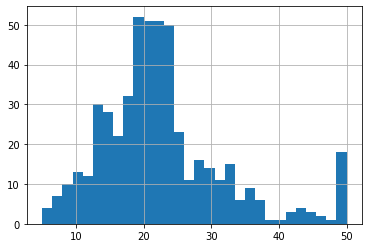

In [19]:
boston_df['MEDV'].hist(bins = 30)

In [20]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<a id="evaluation-metrics-for-regression-problems"></a>
### Regression metrics:

**Mean Squared Error (MSE)**:

### $\frac {1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$

**Root Mean Squared error (RMSE)**:

### $\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

**R^2 (Coefficient of Determination)**:

### $\\ R^2 = 1 - \frac {Sum of Square Errors}{Total Sum of Squares}$


### $\\ R^2 = 1 - \frac {\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$


### $\\ R^2 = 1 - \frac {MSE}{Var(y)}$


* R^2 Accuracy is a _normalized_ view of the mean squared error.
    - Mean Squared Error is the sum of all of the errors for each prediction made.
    - OK to use R^2 for general model training (gauging overall performance, checking for overfitting), but not interpretable for a continuous value!

* We'll be using RMSE mostly, since it's the closest in scale and units of the target variable.
    - Interpret as "for every prediction I make, I can expect the value to be this amount over or under the real value."
    - Somewhat of a relative value, best for comparing models between each other.
    - The closer to 0, the better.
    - Recall, it incorporates the sum of *all of the squared errors* for the predictions (the red lines in the figure above, which are the distinaces between the actual y values from the predicted y values (y-hat).

#### Baseline for a Regression model:

* For a regression model, the error from using the mean of the target variable as your prediction for every value is the baseline accuracy.
    - This is equivalent to just guessing the average home price for every data point as your prediction.
    - If a regression model can produce a lower RMSE than the baseline RMSE, then we can conclude it is better than the baseline (better than guessing the mean).
   

<AxesSubplot:>

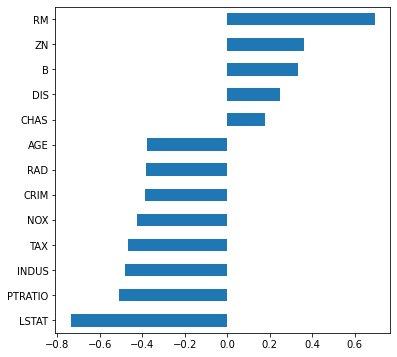

In [21]:
plt.figure(figsize=(6,6))
boston_df.corr()['MEDV'].sort_values()[:-1].plot(kind = 'barh')

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [23]:
# Train Test Split
X = boston_df.drop(columns = ['MEDV'])
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Declare Model Objects

linreg = LinearRegression()
lasso  = Lasso()
ridge  = Ridge()

linreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train);

In [24]:
def print_reg_scores(model, model_name):
    print("------ Showing all results for {} --------\n".format(model_name))
    print(model, "\n")
    print("{} R^2 Scores  ".format(model_name))
    print("Training Set : {:.2%}".format(model.score(X_train, y_train)))
    print("Testing Set  : {:.2%}\n".format(model.score(X_test, y_test)))
    
    y_train_preds = model.predict(X_train)
    y_test_preds  = model.predict(X_test)
    
    y_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_preds))
    y_test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_preds))
    
    print("{} RMSE ".format(model_name))
    print("Training Set : {:.3}".format(y_train_rmse))
    print("Testing Set  : {:.3}\n".format(y_test_rmse))

In [25]:
mean_MEDV = boston_df['MEDV'].mean()

In [26]:
mean_MEDV

22.532806324110698

In [27]:
train_baseline_array = [mean_MEDV for i in range(0, y_train.shape[0])]
test_baseline_array  = [mean_MEDV for i in range(0, y_test.shape[0])]

In [28]:
def calc_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [29]:
print("Baseline RMSE:")
print("Training Set : {:.3}".format(calc_rmse(y_train, train_baseline_array)))
print("Testing Set  : {:.3}".format(calc_rmse(y_test, test_baseline_array)))

Baseline RMSE:
Training Set : 9.01
Testing Set  : 9.58


In [30]:
print_reg_scores(linreg, "LinReg")

------ Showing all results for LinReg --------

LinearRegression() 

LinReg R^2 Scores  
Training Set : 71.04%
Testing Set  : 78.36%

LinReg RMSE 
Training Set : 4.85
Testing Set  : 4.45



In [31]:
print_reg_scores(lasso, "LASSO")

------ Showing all results for LASSO --------

Lasso() 

LASSO R^2 Scores  
Training Set : 64.26%
Testing Set  : 66.95%

LASSO RMSE 
Training Set : 5.39
Testing Set  : 5.5



In [32]:
print_reg_scores(ridge, "Ridge")

------ Showing all results for Ridge --------

Ridge() 

Ridge R^2 Scores  
Training Set : 70.64%
Testing Set  : 78.91%

Ridge RMSE 
Training Set : 4.88
Testing Set  : 4.4



In [33]:
def plot_residuals(model, model_name):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    plt.figure(figsize = (8,6))
    plt.scatter(y_train, y_train_pred,
                c='steelblue', marker = 'o', edgecolor = 'white', label = 'Training data')
    plt.scatter(y_test, y_test_pred,
                c='limegreen', marker = 'o', edgecolor = 'white', label = 'Test data')
    plt.plot([i for i in range(0, int(max(boston_df['MEDV'])))],
             [i for i in range(0, int(max(boston_df['MEDV'])))], c = 'black', marker ='.')
    plt.xlabel('Predicted Values (MEDV)', fontsize = 13)
    plt.ylabel('Test Values (MEDV)',fontsize = 13)
    plt.title("Residuals plot for {}".format(model_name), fontsize= 14)
    plt.legend(loc = 'upper left', fontsize = 13)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

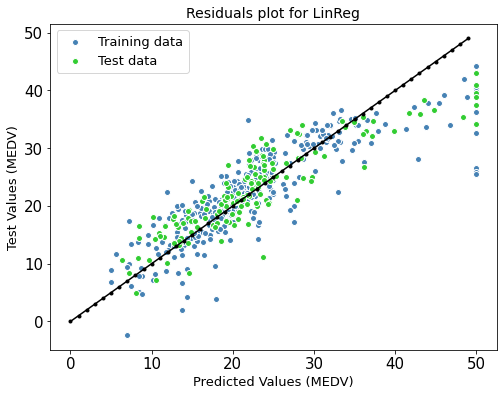

In [34]:
plot_residuals(linreg, "LinReg")

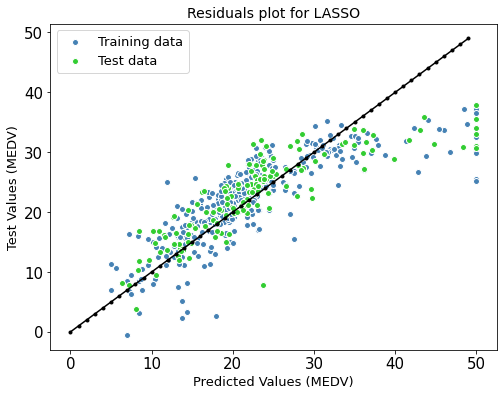

In [35]:
plot_residuals(lasso, "LASSO")

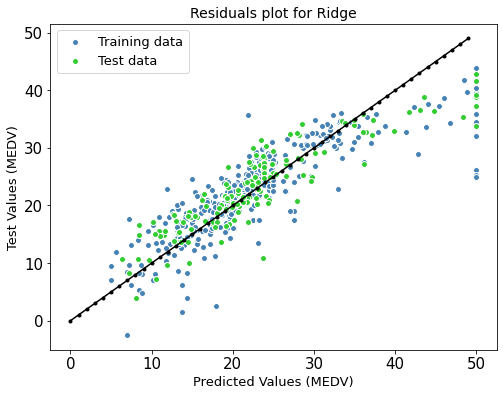

In [36]:
plot_residuals(ridge, "Ridge")